In [1]:
!pip install SciencePlots

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import scipy

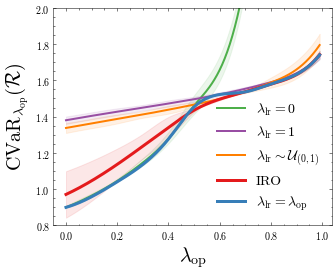

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
# Data from the table
lambdas = np.array([0.0, 0.1,0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 0.99])
import numpy as np
import scienceplots
import matplotlib as mpl
plt.style.use(['science','no-latex'])
# Organizing the provided data for each category into a structured format

# Organizing the provided data for each category into a structured format

precise_data = {
   "GT": {
        "mean": np.array([0.8991, 0.9576, 1.04, 1.1356,1.2763, 1.4532, 1.5363, 1.5798, 1.6333, 1.7403]),
        "std": np.array([0.000784345811122722, 0.00063092600757835, 0.0013082258532972504, 0.0025478081343590425,
                         0.001504729364493038, 0.0013143527864141915, 0.002022444400985063, 0.0010776020330300663,
                         0.0041603038209401646, 0.021988017070494116])
    },
    #"Median": {
    #    "mean": np.array([1.0835, 1.1981, 1.3466, 1.5374, 1.7916, 2.1475, 3.57, 5.3468, 5.9477, 6.3915]),
    #    "std": np.array([0.013786015699471493, 0.015269426735707785, 0.0517195542562129296, 0.0822983654919835676,
    #                     0.19672944034945187, 0.2762422340734978, 0.4614077816079419, 0.6927418410571463,
    #                     0.7831316914093008, 0.8401799423037523])
    #},
    "Uniform": {
        "mean": np.array([1.3372, 1.3623, 1.3869, 1.4115, 1.438, 1.4661, 1.5376, 1.5878, 1.6601, 1.7948]),
        "std": np.array([0.027806824656774795, 0.02642598859583695, 0.024480699353599457, 0.018167259866189046,
                         0.02177916091156457, 0.013019080703216916, 0.007534559288809371, 0.028014396650638793,
                         0.04854746014359689, 0.06199954927437302])
    },
    "Avg": {
        "mean": np.array([0.8988, 0.9636, 1.0447, 1.1461, 1.2783, 1.4601, 2.1651, 3.0237, 3.3513, 3.6282]),
        "std": np.array([0.004377119715116398, 9.001513218678728e-03, 8.038263501313438e-03, 0.0194394822325554252,
                         0.0311491051083203802, 0.05109070879437001018, 0.08128367246156411566, 0.0915299679645597291,
                         0.1015794782489660564, 0.109113114719558278])
    },
    "Worst": {
        "mean": np.array([1.3798, 1.404, 1.4269, 1.4489, 1.472, 1.4958, 1.5535, 1.5895, 1.6396, 1.7347]),
        "std": np.array([0.020555205204452334, 0.019660489711726997, 0.018463915272893688, 0.01542015590978162,
                         0.017112011734273583, 0.01380004050737212, 0.010283970769681296, 0.006941964221718019,
                         0.0051016308770664934, 0.018031750287653064])
    },
    "IRO":{
    "mean": np.array([0.9704, 1.0456, 1.1363, 1.2366, 1.3397, 1.4352, 1.5368, 1.5786, 1.6319, 1.7421]),
    "std": np.array([0.12813684895547792, 0.11029610407552813, 0.0871513849466196, 0.06845165114247202, 
                     0.05827963556802068, 0.00881032968391223, 0.0026464087586982985, 0.0017994254545338664, 
                     0.005297690965773182, 0.021476780119746134])
    }
}

custom_legend_names = {
    "GT": r'$\lambda_{\mathrm{lr}}=\lambda_{\mathrm{op}}$',
    "Reg": r'Two-stage Reg.',
    "Beta(0.1,0.2)": r'Beta(0.1,0.2)',
    "Chebyshev": "Chebyshev",
    #"Median": "Median",
    "Avg": r'$\lambda_{\mathrm{lr}}=0$',
    "Worst": r'$\lambda_{\mathrm{lr}}= 1$',
    "Uniform": r'$\lambda_{\mathrm{lr}}\sim \mathcal{U}_{(0,1)}$',
    "IRO": 'IRO'
}

# Different color for each learner

colors = {
    #"Median": "brown", 
    "Avg": '#4daf4a',"Worst":'#984ea3', 
    "Uniform": '#ff7f00', "IRO": '#e41a1c', "GT": '#377eb8'
}

plt.figure(figsize=(5, 4))
for learner, color in colors.items():
    xnew = np.linspace(lambdas.min(), lambdas.max(), 300)  

    # Smooth the mean
    mean_spline = make_interp_spline(lambdas, precise_data[learner]["mean"], k=3)
    mean_smooth = mean_spline(xnew)
    linewidth = 3 if learner in ["GT", "IRO"] else 2
    plt.plot(xnew, mean_smooth, label=custom_legend_names[learner], linewidth = linewidth, color=color)

    # Smooth the standard deviation
    std_spline_up = make_interp_spline(lambdas, precise_data[learner]["mean"]+precise_data[learner]["std"], k=3)
    std_spline_dow = make_interp_spline(lambdas, precise_data[learner]["mean"]-precise_data[learner]["std"], k=3)
    std_smooth_up, std_smooth_dow = std_spline_up(xnew), std_spline_dow(xnew)
    plt.fill_between(xnew, 
                     std_smooth_up, 
                     std_smooth_dow, 
                     color=color, alpha=0.1)
# Limit y-axis to exclude outlier values
plt.ylim(0.8, 2)  # Set y-axis limit

# Labels and title
plt.xlabel(r'$\lambda_{\mathrm{op}}$', fontsize=20)
plt.ylabel(r'$\mathrm{CVaR}_{\lambda_{\mathrm{op}}}(\mathbf{\mathcal{R}})$',fontsize=20)
#plt.title('Precise vs Imprecise Learner')
plt.legend(fontsize=14)
plt.grid(False)
plt.savefig('precisevsimprecise.pdf', format='pdf', bbox_inches='tight')
# Show the plot
plt.show()

In [4]:
data={'GT': {'mean': [1.4103769, 1.4378386, 1.4484534, 1.4586779, 1.4800152, 1.4980229, 1.5221974, 1.5438681, 1.5663155, 1.6093086, 1.6739283, 1.8450341], 
             'std': [6.0333365e-05, 0.00012868515, 0.00018246943, 0.00042534684, 0.00085180457, 0.0016566262, 0.002020032, 0.0022243669, 0.0027971738, 0.007835178, 0.008798127, 0.0128215095]}, 
      'Beta_5_5': {'mean': [1.4417597, 1.4743761, 1.486887, 1.495078, 1.5046092, 1.5074819, 1.5192446, 1.5618466, 1.6369547, 1.7336115, 1.85967, 2.1456826], 
                   'std': [0.00044594632, 0.0028780566, 0.017411288, 0.026133804, 0.027231425, 0.028156495, 0.028331075, 0.032065053, 0.08560206, 0.14141159, 0.19780178, 0.2707712]}, 
      'Beta_5_1': {'mean': [1.4737219, 1.5153322, 1.534801, 1.5509204, 1.5830007, 1.6110921, 1.6256819, 1.6281333, 1.6294426, 1.6304718, 1.6788349, 1.8774508], 
                   'std': [0.0081347525, 0.017142529, 0.03521558, 0.041293867, 0.057650264, 0.05831416, 0.0593704976, 0.0600034826, 0.0610533488, 0.071383576, 0.091602009, 0.10252662]}, 
      'Beta_1_1': {'mean': [1.442861, 1.4856548, 1.5047183, 1.5204307, 1.5491524, 1.5700105, 1.5787927, 1.5799574, 1.582384, 1.6048793, 1.6787823, 1.8650837], 
                   'std': [0.005295536, 0.01958909, 0.019676127, 0.023133665, 0.03206539, 0.032934804, 0.036861952, 0.040994436, 0.044662636, 0.047006253, 0.047482148, 0.049786516]}, 
      'Pareto': {'mean': [1.4106197, 1.4394284, 1.4521184, 1.4630718, 1.4853634, 1.5090071, 1.535571, 1.568193, 1.6082636, 1.6570764, 1.7352015, 1.911233], 
                 'std': [0.0010310645, 0.0022481913, 0.0027717235, 0.0032523444, 0.005009367, 0.008459824, 0.014195537, 0.022098856, 0.031118833, 0.037093427, 0.040427327, 0.051565323]}}

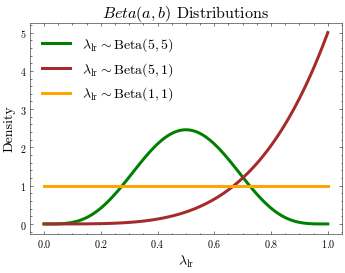

In [5]:
# Different color for each learner
import scienceplots
from scipy.stats import beta
from scipy.interpolate import make_interp_spline
plt.style.use(['science','no-latex'])
from scipy.interpolate import make_interp_spline
true_alphas = [0.0, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
custom_legend_names = {
    "GT": "$\lambda_{\mathrm{lr}}=\lambda_{\mathrm{op}}$",
    "Beta_5_5":"$\lambda_{\mathrm{lr}}\sim \mathrm{Beta(5,5)}$",
    "Beta_5_1":"$\lambda_{\mathrm{lr}}\sim \mathrm{Beta(5,1)}$",
    "Beta_1_1":"$\lambda_{\mathrm{lr}}\sim \mathrm{Beta(1,1)}$",
    "Pareto": "IRO"
}

colors = {
    "GT": "blue", 
    "Beta_5_5": "green",
    "Beta_5_1": "brown", 
    "Beta_1_1": "orange",
    "Pareto": "Red"
}
lambdas = np.array(true_alphas)
beta_params = {
    "Beta_5_5": (5, 5),
    "Beta_5_1": (5, 1),
    "Beta_1_1": (1, 1)
}
plt.figure(figsize=(5, 4))
# Plotting Beta distributions on the left plot
for learner, (a, b) in beta_params.items():
    x = np.linspace(0, 1, 100)
    y = beta.pdf(x, a, b)
    plt.plot(x, y, color=colors[learner], label=custom_legend_names[learner], linewidth=3)
plt.title('$Beta(a,b)$ Distributions',fontsize=16)
plt.xlabel('$\lambda_{\mathrm{lr}}$',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.legend(fontsize=14)
plt.grid(False)
# Display the plot
plt.tight_layout()
plt.show()

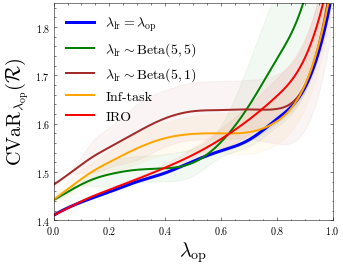

In [6]:
# Plotting data on the right plot
custom_legend_names = {
    "GT": "$\lambda_{\mathrm{lr}}=\lambda_{\mathrm{op}}$",
    "Beta_5_5":"$\lambda_{\mathrm{lr}}\sim \mathrm{Beta(5,5)}$",
    "Beta_5_1":"$\lambda_{\mathrm{lr}}\sim \mathrm{Beta(5,1)}$",
    "Beta_1_1":"Inf-task",
    "Pareto": "IRO"
}

colors = {
    "GT": "blue", 
    "Beta_5_5": "green",
    "Beta_5_1": "brown", 
    "Beta_1_1": "orange",
    "Pareto": "Red"
}
lambdas = np.array(true_alphas)
plt.figure(figsize=(5, 4))
for learner, color in colors.items():
    if learner in data:
        xnew = np.linspace(lambdas.min(), lambdas.max(), 300) 
        mean_spline = make_interp_spline(lambdas, data[learner]["mean"], k=3)
        mean_smooth = mean_spline(xnew)
        linewidth = 3 if learner in ["GT", "IRO"] else 2
        plt.plot(xnew, mean_smooth, color=color, label=custom_legend_names[learner], linewidth=linewidth)
        std_spline_up = make_interp_spline(lambdas, np.array(data[learner]["mean"]) + np.array(data[learner]["std"]), k=3)
        std_spline_down = make_interp_spline(lambdas, np.array(data[learner]["mean"]) - np.array(data[learner]["std"]), k=3)
        std_smooth_up, std_smooth_down = std_spline_up(xnew), std_spline_down(xnew)
        plt.fill_between(xnew, std_smooth_up, std_smooth_down, color=color, alpha=0.05)


plt.legend(fontsize=14)
plt.ylim(1.4, 1.85)
plt.xlim(0, 1)
plt.legend(fontsize=14)
#plt.title('Ablation of $Q$ on Beta (a,b)',fontsize=16)
plt.xlabel('$\lambda_{\mathrm{op}}$',fontsize=20)
plt.ylabel('$\mathrm{CVaR}_{\lambda_{\mathrm{op}}}(\mathbf{\mathcal{R}})$',fontsize=20)
plt.savefig('beta_ablation.pdf', format='pdf', bbox_inches='tight')
plt.grid(False)


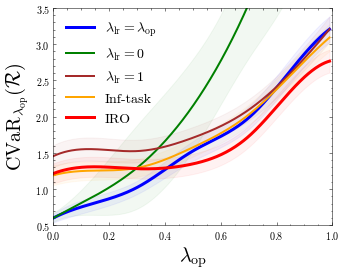

In [8]:
data = {
    "GT": {
        "mean": [0.6008, 0.7525, 1.0219, 1.5248, 1.9827, 2.8652, 3.2056],
        "std": [0.062487297, 0.090521835, 0.092109464, 0.13646807, 0.15742497, 0.17042951, 0.176703167]
    },
    "Avg Case": {
        "mean": [0.6008, 0.8054, 1.2925, 2.1462, 3.5512, 5.5655, 6.5492],
        "std": [0.062487297, 0.17021823, 0.5738335, 0.63073488, 0.76290011, 1.4481554, 1.34328]
    },
    "Worse Case": {
        "mean": [1.4544, 1.5481, 1.5238, 1.7074, 2.0924, 2.8042, 3.2056],
        "std": [0.151816624, 0.15891913, 0.156156296, 0.14794456, 0.145962766, 0.15958477, 0.176703167]
    },
    "Inf": {
        "mean": [1.189, 1.2485, 1.292, 1.5748, 2.0255, 2.7633, 3.0909],
        "std": [0.136997822, 0.13010079, 0.122915152, 0.127516893, 0.14079916, 0.16846551, 0.186070627]
    },
    "Pareto": {
        "mean": [1.2149, 1.2999, 1.2805, 1.3472, 1.7259, 2.5447, 2.765],
        "std": [0.139259946, 0.13867811, 0.134919566, 0.140047634, 0.147187144, 0.15499676, 0.158017594]
    }
}
custom_legend_names = {
    "GT": "$\lambda_{\mathrm{lr}}=\lambda_{\mathrm{op}}$",
    "Avg Case":"$\lambda_{\mathrm{lr}}=0$",
    "Worse Case":"$\lambda_{\mathrm{lr}}=1$",
    "Inf":"Inf-task",
    "Pareto": "IRO"
}

colors = {
    "GT": "blue", 
    "Avg Case": "green",
    "Worse Case": "brown", 
    "Inf": "orange",
    "Pareto": "Red"
}
plt.figure(figsize=(5, 4))
true_alphas = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
lambdas = np.array(true_alphas)
# Plotting data on the right plot
for learner, color in colors.items():
    if learner in data:
        xnew = np.linspace(lambdas.min(), lambdas.max(), 300) 
        mean_spline = make_interp_spline(lambdas, data[learner]["mean"], k=3)
        mean_smooth = mean_spline(xnew)
        linewidth = 3 if learner in ["GT", "Pareto"] else 2 
        plt.plot(xnew, mean_smooth, color=color, label=custom_legend_names[learner], linewidth=linewidth)
        std_spline_up = make_interp_spline(lambdas, np.array(data[learner]["mean"]) + np.array(data[learner]["std"]), k=3)
        std_spline_down = make_interp_spline(lambdas, np.array(data[learner]["mean"]) - np.array(data[learner]["std"]), k=3)
        std_smooth_up, std_smooth_down = std_spline_up(xnew), std_spline_down(xnew)
        plt.fill_between(xnew, std_smooth_up, std_smooth_down, color=color, alpha=0.05)


plt.legend(fontsize=14)
plt.ylim(0.5, 3.5)
plt.xlim(0, 1)
plt.legend(fontsize=14)
#plt.title('Bike Sharing Eval',fontsize=16)
plt.xlabel('$\lambda_{\mathrm{op}}$',fontsize=20)
plt.ylabel('$\mathrm{CVaR}_{\lambda_{\mathrm{op}}}(\mathbf{\mathcal{R}})$',fontsize=20)
plt.savefig('bike_sharing.pdf', format='pdf', bbox_inches='tight')